# ZADANIE
Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:

1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)). Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)  **(1p.)**
2. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) **(1p.)**
3. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników (słupki błędów)  **(1p.)**

In [19]:
library(microbenchmark)

df <- data.frame(size = integer(),
                 vector = double(),
                 matrix = double())

for (length in seq(from = 2, to = 2002, by = 100)) {
  for (i in 1:11) {
    first <- sample(0:9, length, replace = TRUE)
    second <- sample(0:9, length, replace = TRUE)
    matrix <- matrix(sample(0:9, length^2, replace = TRUE), ncol = length)
    time1 <- microbenchmark(first * second, times = 1)$time[1]
    time2 <- microbenchmark(matrix * first, times = 1)$time[1]
    if (i != 1) {
      df <- rbind(df, data.frame(size = length, vector = time1, matrix= time2))
    }
  }
}
print(df)


    size vector  matrix
1      2   6700   10200
2      2   6200   10100
3      2   7400    8700
4      2   6500    9600
5      2   8500    9000
6      2   5900   12800
7      2   8000    9700
8      2   7500    8500
9      2   7500   10800
10     2   7000    9700
11   102   8900   48400
12   102   8500   38800
13   102   8400   35700
14   102   9000   41400
15   102  10000   45000
16   102   9300   43200
17   102   9600   39500
18   102  12900   41600
19   102   9900   45200
20   102   9200   40100
21   202   9100  100000
22   202  10600   92600
23   202   9200   90100
24   202   9700  109000
25   202   8400   87600
26   202   9000  108900
27   202   9100  100400
28   202   9300   90500
29   202  11200   90500
30   202  10500   92900
31   302  15300  165400
32   302  11900  168200
33   302  10000  193000
34   302  11300  169200
35   302  15500  165500
36   302  10700  172500
37   302  10800  179200
38   302   9700  171500
39   302  10900  176500
40   302   9300  168200
41   402  10300 

In [20]:
df_res <- aggregate(cbind(vector,matrix) ~ size, data=df, FUN=mean)
df_res$vector_error <- aggregate(vector ~ size, data=df, FUN=sd)$vector
df_res$matrix_error <- aggregate(matrix ~ size, data=df, FUN=sd)$matrix
options(repr.plot.width = 10, repr.plot.height =5)
print(df_res)

   size vector  matrix vector_error matrix_error
1     2   7120    9910     813.4973     1235.089
2   102   9570   41890    1285.8633     3679.206
3   202   9610   96250     877.4331     7868.255
4   302  11540  172920    2171.6353     8351.021
5   402  11510  289200    5074.2159    16582.655
6   502   9910  472950    3563.2226   154193.747
7   602  10810  704970    1270.5642    11613.981
8   702   9740  930490    1725.1087    27828.740
9   802   9570 1231920    2099.2327    34856.907
10  902  13520 1508710    3225.1787    35992.174
11 1002  13390 1946450    6472.9265   120189.353
12 1102  11760 2414590    2998.5923   173719.528
13 1202  13780 2863720    2877.0355   302083.682
14 1302   9870 3175070    3189.2354   135534.416
15 1402  13320 3640600    8497.9475    84214.251
16 1502  12010 4226550    1664.9658   219217.129
17 1602  14410 4767040    2748.1105   181873.914
18 1702  11710 5409030    1577.2339   166581.399
19 1802  10310 6020290     997.1626   107739.495
20 1902  11550 68509

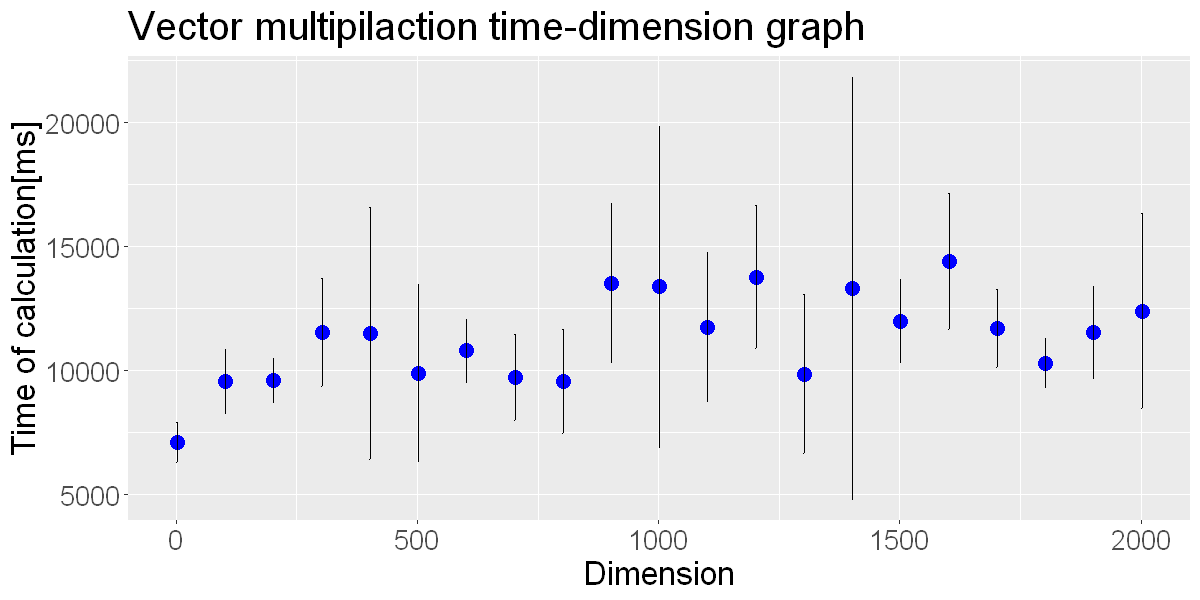

In [21]:
library(ggplot2)

a <- ggplot(df_res, aes(x=size)) + 
geom_point(aes(y = vector), size = 4,color="blue") + 
theme(text = element_text(size = 20)) +
ggtitle("Vector multipilaction time-dimension graph") +
xlab("Dimension") +
ylab("Time of calculation[ms]") + 
geom_errorbar(aes(ymin = vector-vector_error, ymax = vector+vector_error, width=2)) 

a

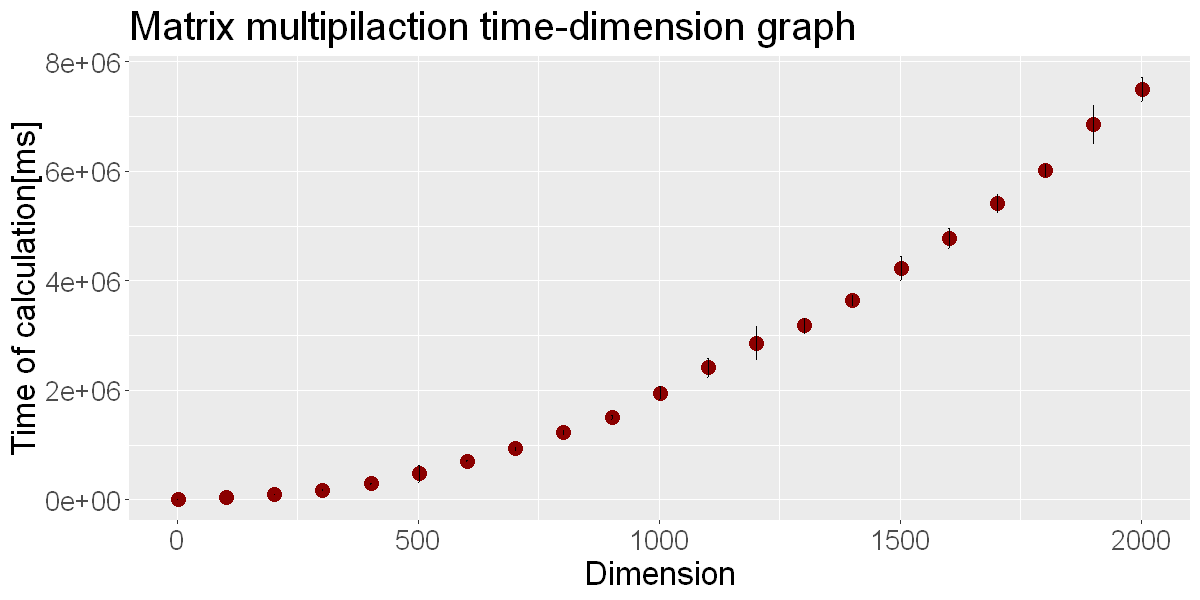

In [22]:
library(ggplot2)

a <- ggplot(df_res, aes(x=size)) + 
geom_point(aes(y=matrix), size = 4, color="darkred") + 
theme(text = element_text(size = 20)) +
ggtitle("Matrix multipilaction time-dimension graph") +
xlab("Dimension") +
ylab("Time of calculation[ms]") + 
geom_errorbar(aes(ymin = matrix-matrix_error, ymax = matrix+matrix_error, width=2)) 
a

#### Język R wypada w tych obliczeniach znacznie wolniej niż język Julia(wielokrotna przewaga na rzecz tego drugiego)